In [ ]:
# Melanie Schwartz 
# sno122

## Lab 4A

Lab 4 consist of two exercises. This is the first exercise will cover JSON as well as some string processing, ```DataFrame```s, and plotting.

In this exercise, you will write a program that reads an external JSON file with information about Python and Java books and creates a plot based on the number of books published per year. 


### About the JSON File

The JSON file ```python-books-google.json```contains sample data from 40 books on Python retrieved from Google API at https://www.googleapis.com/books/v1/volumes?q=subject:python. Open the JSON file and inspect it to see the hierarchy of data, which will help you in extracting data from it. The range of years spans from 2002 through 2020 though not every year is accounted for. 

### Tasks 

You will do the following tasks:

1. Read in the ```python-books-google.json``` and ```java-books-google.json``` as a JSON.

2. Traverse the JSON and extract the following data from each book. You will add this data in a ```DataFrame```.
    * Industry Identifer - Look for a book's ```industryIdentifiers```. We will include the ```ISBN_13``` rather than the ```ISBN_10``` should an ISBN be available. If there is an ```OTHER``` identifer available,  that means there is no ISBN and you can use ```'0000000000000'``` as the ISBN instead. You will later need to know how to distinguish these books from the ones that have an ISBN. There is one Java book which has no industry identifer at all nor year. Do not include this book in your program. 
    * Year - Look for a book's ```publishedDate```. The published date may be the four digit year YYYY or the full date as YYYY-MM-DD. Extract the year. HINT: The year is saved as a string, but you will need to convert it to a number. As mentioned above, there is one Java book which has no industry identifer at all nor year. Do not include this book in your program. 
    
3. Create a ```DataFrame``` with this information: Industry Identifier, Year, and Book Type (Python or Java). You will then need to transform your ```DataFrame``` so that you can plot a multiple line graph in Seaborn. 

4. Create two Seaborn lineplots. You can create two subplots or a FacetGrid. Both plots have the year on the x-axis and the number of books published on the y-axis. Set the x-axis limits to both lineplots to 1996 to 2022.

    * Lineplot 1 will have two lines. One line will represent the number of books published in Python while another line represents the number of Java books published. 
    * Lineplot 2 will have two lines (maybe). This lineplot will only contain books that had the ```OTHER``` ISBN number. One line will represent the number of books published in Python while another line represents the number of Java books published. 

4. Answer the questions below.

### Hints

Know your JSON file look at the structure. 

The first level item you want to in the JSON is ```items```.

Note that you are looking for ```industryIdentifiers``` and ```publishedDate``` keys; however, they may or may not exist. So, you have also check for their existence before you access. Otherwise, you will get a **KeyError**. For example, 

You may need to use ```melt()```, ```group_by()```, and a combination of Pandas functions and methods. Some solutions involve creating additional ```DataFrame```s.

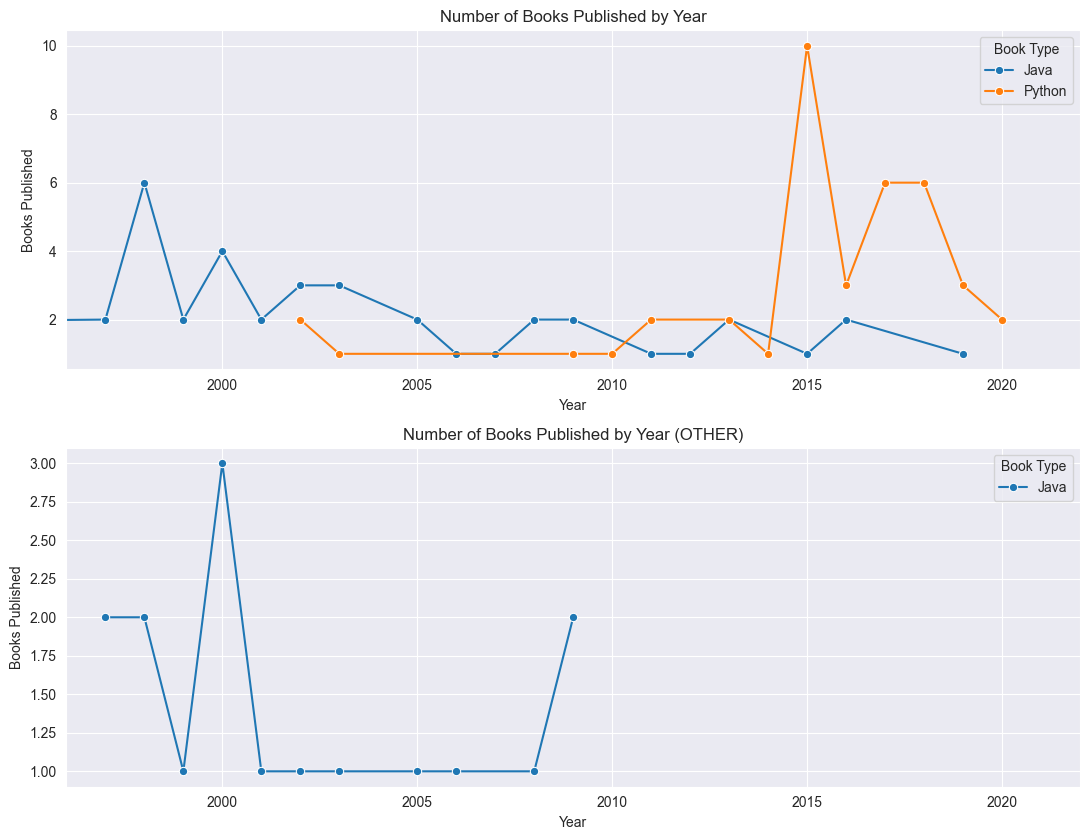

In [25]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Write your code here to parse the JSONs
# 1. Read in the JSON files
def jsonFile(filePath, book_type):
    with open(filePath) as file:
        data = json.load(file)
        
    # 2. Create an empty DataFrame
    bookInfo = []
    for book in data['items']:
        volume = book.get('volumeInfo', {})
        industryID = volume.get('industryIdentifiers', [])
        published_date = volume.get('publishedDate', '1900')
        year = int(published_date[:4])

        isbn_13 = '0000000000000'  # if ISBN_13 or OTHER is not found
        for identifier in industryID:
            if identifier['type'] == 'ISBN_13':
                isbn_13 = identifier['identifier']
                break
            elif identifier['type'] == 'OTHER':
                isbn_13 = '0000000000000'
                
        # Skip books without identifiers and year
        if not industryID:
            continue

        bookInfo.append({
            'Industry Identifier': isbn_13,
            'Year': year,
            'Book Type': book_type
        })
    return bookInfo

# File paths
pythonFile = 'python-books-google.json'
javaFile = 'java-books-google.json'

# 3. Traverse each JSON; Extract the required information, which may also require some string processing; 
pythonBooks = jsonFile(pythonFile, 'Python')
javaBooks = jsonFile(javaFile, 'Java')

# Add it into the DataFrame.
df_books = pd.DataFrame(pythonBooks + javaBooks)

# 4. - Transform data for visualization
df_count = df_books.groupby(['Year', 'Book Type']).size().reset_index(name='Books Published')
df_other = df_books[df_books['Industry Identifier'] == '0000000000000'].groupby(['Year', 'Book Type']).size().reset_index(name='Books Published')

fig, ax = plt.subplots(2, 1, figsize=(11, 8.5))

# Lineplot for all books
sns.lineplot(data=df_count, x='Year', y='Books Published', hue='Book Type', ax=ax[0], marker='o')
ax[0].set_title('Number of Books Published by Year')
ax[0].set_xlim(1996, 2022)

# Lineplot for books with 'OTHER' 
sns.lineplot(data=df_other, x='Year', y='Books Published', hue='Book Type', ax=ax[1], marker='o')
ax[1].set_title('Number of Books Published by Year (OTHER)')
ax[1].set_xlim(1996, 2022)

plt.tight_layout()
plt.show()

## Questions

Answer the following questions:

1. What trends do you see with respect to the number of books published on Java versus Python? Although this sample of books is very small, what are some possible reasons for these trends? Look at some other data or sources to see if there were changes in programming language popularity and discuss how they may or may not be related to what you see in these plots. Include your references in your responses.

2. If a book does not have an ISBN number and published after the 1970s, then the book was intended to not be sold in retail. What trends do you see with respect to the number of books published, but not intended for retail, on Java versus Python? What are some possible reasons for these trends?

## Answers

Enter your responses here.
1. After researching the trends vs the spike in popularity of Python over Java in the later 2010's/earlier 2020's, I have been able to conclude small factors that contribute to a larger impact. First, there have been broad shifts in programming languages due to the emerging fields that we have seen in the past few years i.e. data science and machine learning. Python is a much easier language when it comes to simplifying data manipulation, visualization, and analysis. While Java is still an effective and widely used language, there are some cons in comparison to Python. Java has a steeper learning curve due to more complex programming rules and it is not as much of a functional programming language as Python is. Java is a great tool for back end development, but Python is simpler and more dynamic when it comes to data.
Sources: 
https://jaydevs.com/python-vs-java/
https://www.tiobe.com/tiobe-index/
2. The trend of publishing books without an ISBN after the 1970s, not intended for retail, could reflect the specialized nature of these publications. This could indicate a preference for distributing certain technical or educational content directly to specific audiences, such as educational institutions, corporate training programs, or dev communities. The reasons could include the rapid evolution of these languages, the specificity of topics that may not have broad market appeal, or the open source model within the programming community. This approach allows authors to target their writings more directly to an intended audience's needs.
Source:
https://infusion.media/books/why-your-book-needs-an-isbn/
https://blog.lulu.com/do-you-need-an-isbn/
https://www.isbn.org/faqs_general_questions